In [1]:
import copy
import matplotlib.pyplot as plt
import numpy
import pandas
import plotly
import six
import tensorflow as tf

import CS230

In [2]:
file_paths = CS230.data.get_all_file_paths()

# experiment 3 - largest possible network

In [3]:
file_path = file_paths[0]
data_columns = copy.deepcopy(CS230.data.COLUMNS_ALL)
data_columns.extend(CS230.data.COLUMNS_MOTION_DERIVS)
label_columns = copy.deepcopy(CS230.data.COLUMNS_MOTION_DERIVS)

train_percent = 0.9
dev_percent = 0.05
test_percent = 0.05

df = CS230.data.load(file_path)
df = CS230.data.stride_rows(df, stride=50)
df.dropna(axis=0, inplace=True)
df = CS230.data.add_derivatives(df, stride=1)
df = CS230.data.clean_discontinuities(df, stride=1)

#df = tf.keras.utils.normalize(df, axis=0)  # TODO details

df_train, df_dev, df_test, data_columns, label_columns = CS230.data.get_data_sets(df, 
                                                            train_percent, dev_percent, test_percent, 
                                                            data_columns, label_columns)

In [4]:
df_train.head()

,data_HDOP,data_PDOP,data_PPS,data_altitude,data_axCG,data_ayCG,data_azCG,data_brake,data_chassisAccelFL,data_chassisAccelFR,...,label_deriv_rollAngle,label_deriv_rollRate,label_deriv_vxCG,label_deriv_vyCG,label_deriv_wheelAccelFL,label_deriv_wheelAccelFR,label_deriv_wheelAccelRL,label_deriv_wheelAccelRR,label_deriv_yawAngle,label_deriv_yawRate
24709,25.5,25.5,5.0,215.681,-1.12,8.08,11.67,0.0,9.094,6.239,...,0.04,1.74,-0.15,-0.09,14.62,11.18,-1.37,1.40,0.85,-2.87
10950,0.9,1.5,5.0,197.805,0.08,-0.11,9.83,0.0,9.712,9.643,...,0.00,-0.11,0.00,-0.00,0.00,-0.10,0.00,-0.05,0.01,-0.21
31159,2.0,2.8,5.0,215.769,-0.96,9.75,9.99,0.0,9.790,9.987,...,-0.23,-5.00,-0.09,-0.11,11.57,5.98,-14.51,-7.91,0.99,3.60
43852,0.7,1.2,5.0,193.962,-0.69,-0.28,10.46,0.0,9.663,11.134,...,-0.02,-1.39,-0.01,-0.02,0.69,-1.67,0.59,-2.43,0.49,-1.22
46389,0.7,1.2,5.0,194.124,-0.19,0.19,9.78,0.0,9.555,9.741,...,0.00,-0.10,0.00,0.00,-0.39,0.30,0.09,-0.07,-0.01,-0.07


In [5]:
df_train[label_columns].head()

,label_deriv_rollRate,label_deriv_rollAngle,label_deriv_wheelAccelFR,label_deriv_axCG,label_deriv_wheelAccelRL,label_deriv_vyCG,label_deriv_pitchRate,label_deriv_yawAngle,label_deriv_wheelAccelFL,label_deriv_wheelAccelRR,label_deriv_yawRate,label_deriv_vxCG,label_deriv_ayCG,label_deriv_pitchAngle
24709,1.74,0.04,11.18,-1.25,-1.37,-0.09,-9.53,0.85,14.62,1.40,-2.87,-0.15,-0.94,-0.08
10950,-0.11,0.00,-0.10,0.05,0.00,-0.00,-0.30,0.01,0.00,-0.05,-0.21,0.00,-0.01,0.00
31159,-5.00,-0.23,5.98,-0.24,-14.51,-0.11,1.56,0.99,11.57,-7.91,3.60,-0.09,-1.67,0.38
43852,-1.39,-0.02,-1.67,-0.26,0.59,-0.02,0.45,0.49,0.69,-2.43,-1.22,-0.01,0.65,0.00
46389,-0.10,0.00,0.30,-0.02,0.09,0.00,0.20,-0.01,-0.39,-0.07,-0.07,0.00,0.05,-0.01


In [6]:
print('input size: %s' % len(data_columns))
print('output size: %s' % len(label_columns))
print('input+output size: %s' % len(df_train.columns))

input size: 70
output size: 14
input+output size: 84


In [7]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(len(data_columns), activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(data_columns), activation='relu'))

#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.Dense(len(data_columns), activation='relu'))

model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(len(label_columns), activation='sigmoid'))

In [8]:
optimizer = tf.train.AdamOptimizer(0.001)
#optimizer = tf.keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

model.compile(
    optimizer=optimizer, 
    loss='mean_squared_error', 
    metrics=['mean_absolute_error']
)

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
x_train = tf.cast(df_train[data_columns].values, tf.float64)
y_train = tf.cast(df_train[label_columns].values, tf.float64)

In [10]:
history = model.fit(x_train, y_train, epochs=20, steps_per_epoch=200)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
200/200 [==============================] - 11s 57ms/step - loss: 20.3567 - mean_absolute_error: 1.7058
Epoch 2/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3038 - mean_absolute_error: 1.6791
Epoch 3/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3045 - mean_absolute_error: 1.6794
Epoch 4/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3036 - mean_absolute_error: 1.6790
Epoch 5/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3025 - mean_absolute_error: 1.6787
Epoch 6/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3025 - mean_absolute_error: 1.6786
Epoch 7/20
200/200 [==============================] - 10s 52ms/step - loss: 20.3029 - mean_absolute_error

Text(0.5, 0, 'epoch')

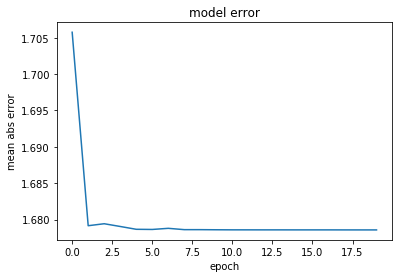

In [11]:
plt.plot(history.history['mean_absolute_error'])
#plt.plot(history.history['val_acc'])
plt.title('model error')
plt.ylabel('mean abs error')
plt.xlabel('epoch')

In [12]:
x_dev = tf.cast(df_dev[data_columns].values, tf.float32)
y_dev = tf.cast(df_dev[label_columns].values, tf.float32)

In [13]:
dev_predictions = model.predict(x_dev, steps=1)

In [14]:
df_dev_predictions = pandas.DataFrame(dev_predictions, columns=label_columns)

In [15]:
df_dev[data_columns].head()

,data_latitude,data_axCG,data_deriv_rollRate,data_horizontalSpeed,data_vyCG,data_gpsOrientMode,data_deriv_wheelAccelRL,data_deriv_pitchRate,data_gpsTime,data_wheelAccelFR,...,data_vxCG,data_chassisAccelRR,data_handwheelAngle,data_numSVsTracked,data_engineSpeed,data_yawRate,data_ayCG,data_chassisAccelRL,data_velAccuracy_east,data_pitchAngle
37213,36.580438,-1.45,2.61,26.52,-0.94,128,-2.45,-5.16,63305.78,12.56,...,26.50,-12.557,54.8,16,3618,29.95,13.93,-7.868,0.017,-0.43
34995,36.582680,1.09,7.63,44.72,0.90,128,15.70,-5.04,63194.88,-0.69,...,44.71,-4.905,-8.6,17,4752,-6.10,-9.55,-2.845,0.022,-0.52
14366,36.587971,0.09,-0.12,0.01,0.01,128,0.20,0.10,62163.38,9.81,...,0.01,-9.810,-32.6,8,204,-0.08,-0.11,-9.839,0.008,-0.74
24009,36.584061,-4.93,-1.65,34.12,1.30,128,-4.12,-15.01,62645.55,6.87,...,34.09,-7.750,2.7,15,4404,-12.65,-10.74,-7.554,0.007,0.53
33861,36.586511,-3.96,5.92,29.96,0.64,128,-2.26,-5.29,63138.17,1.28,...,29.99,-6.769,-1.4,17,3966,-1.06,-4.02,-4.552,0.026,3.79


In [16]:
df_dev[label_columns].head()

,label_deriv_rollRate,label_deriv_rollAngle,label_deriv_wheelAccelFR,label_deriv_axCG,label_deriv_wheelAccelRL,label_deriv_vyCG,label_deriv_pitchRate,label_deriv_yawAngle,label_deriv_wheelAccelFL,label_deriv_wheelAccelRR,label_deriv_yawRate,label_deriv_vxCG,label_deriv_ayCG,label_deriv_pitchAngle
37213,-1.89,-0.02,0.29,-0.45,12.55,-0.16,-5.20,1.54,-0.20,-5.81,0.70,-0.12,-1.85,-0.05
34995,4.87,0.13,15.99,-0.48,10.79,-0.01,3.61,-0.31,-8.64,-13.10,0.82,0.14,0.85,0.03
14366,-0.02,-0.01,-0.10,-0.05,-0.20,-0.01,0.16,0.00,0.00,0.18,0.03,0.00,0.15,0.01
24009,13.12,0.01,6.67,1.69,-14.61,-0.05,-0.38,-0.51,6.87,-0.43,4.30,-0.24,2.97,0.03
33861,-5.40,0.18,2.74,-1.68,-4.80,-0.23,5.47,-0.08,-9.42,-4.84,-1.45,-0.29,-3.45,0.31


In [17]:
df_dev_predictions.head()

,label_deriv_rollRate,label_deriv_rollAngle,label_deriv_wheelAccelFR,label_deriv_axCG,label_deriv_wheelAccelRL,label_deriv_vyCG,label_deriv_pitchRate,label_deriv_yawAngle,label_deriv_wheelAccelFL,label_deriv_wheelAccelRR,label_deriv_yawRate,label_deriv_vxCG,label_deriv_ayCG,label_deriv_pitchAngle
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
error = df_dev.reset_index(drop=True)[label_columns] - df_dev_predictions[label_columns]

In [19]:
error.head()

,label_deriv_rollRate,label_deriv_rollAngle,label_deriv_wheelAccelFR,label_deriv_axCG,label_deriv_wheelAccelRL,label_deriv_vyCG,label_deriv_pitchRate,label_deriv_yawAngle,label_deriv_wheelAccelFL,label_deriv_wheelAccelRR,label_deriv_yawRate,label_deriv_vxCG,label_deriv_ayCG,label_deriv_pitchAngle
0,-1.89,-0.02,0.29,-0.45,12.55,-0.16,-5.20,1.54,-0.20,-5.81,0.70,-0.12,-1.85,-0.05
1,4.87,0.13,15.99,-0.48,10.79,-0.01,3.61,-0.31,-8.64,-13.10,0.82,0.14,0.85,0.03
2,-0.02,-0.01,-0.10,-0.05,-0.20,-0.01,0.16,0.00,0.00,0.18,0.03,0.00,0.15,0.01
3,13.12,0.01,6.67,1.69,-14.61,-0.05,-0.38,-0.51,6.87,-0.43,4.30,-0.24,2.97,0.03
4,-5.40,0.18,2.74,-1.68,-4.80,-0.23,5.47,-0.08,-9.42,-4.84,-1.45,-0.29,-3.45,0.31
